# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [123]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
import numpy as np
import collections
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

**Answer 5.0.1**
- The internet
    - Nodes: routers
    - Links: internet connections
- The "Hollywood actor network"
    - Nodes: actors
    - Links: movies the actors have co-starred in
- The email network
    - Nodes: email-addresses
    - Links: emails sent between email-addresses

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

**Answer 5.0.2**

Mapping of one individual's physical contact/are within a 2m radius of other people 
- Nodes: people
- Linkes: physical contact/within a 2m radius
- Size: assumingly very, very large 
- Yes the 2m radius can be mapped but requires a lot of information. Could be data from celephones to observe how close people are to each other. I'm not sure physical contact could be mapped due to a lack of data.
- Highly relevant: people at contagion-risk from patient 0 of covid-19 have oftent been mapped


> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

**Answer 5.0.3**
Network science used for reseach and forecasting in epidemics

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

**Answer 5.0.4**
In the example of people's contagion-risk, each node will have many links but we will never have had physical contact/been at contagion-risk distance with the same people as every other individual has: the network is still sparse despite each node has many connections.


### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [25]:
G = nx.Graph()

G.add_node(4)
G.add_edges_from([(2, 3), (1, 4)])

G.number_of_nodes()
#G.number_of_edges()

4

In [26]:
G.remove_node(4)

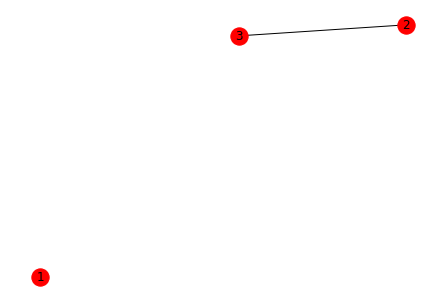

In [27]:
nx.draw(G, with_labels=True)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

In [28]:
from collections import Counter
from scipy.special import comb

In [33]:
def compute_degree_dist(network, p):
    N = network.number_of_nodes()
    
    degrees = sorted([d for n, d in network.degree()])
    counts = Counter(degrees)
    degrees, counts = zip(*counts.items())
    empirical_probs = [c/N for c in counts]    
                     
    theoretical_probs = [comb(N-1, k) * (p**k) * (1-p)**(N-1-k) for k in degrees]
    
    return degrees, empirical_probs, theoretical_probs

In [34]:
ER = nx.gnp_random_graph(n=500, p=0.1)

degr, e_probs, t_probs = compute_degree_dist(ER, 0.1)

/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


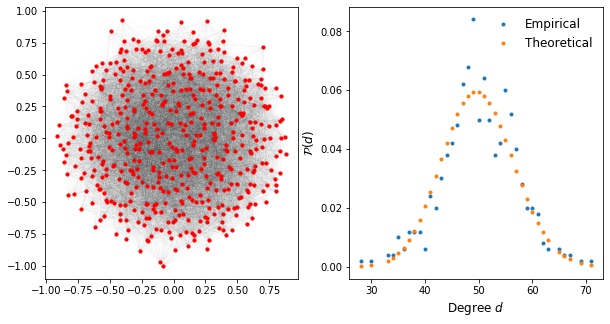

In [76]:
fig, ax = plt.subplots(1 ,2, figsize=(10,5))
pos = nx.spring_layout(ER)
nx.draw_networkx_nodes(ER, pos, node_size=10, with_labels=False, ax=ax[0])
nx.draw_networkx_edges(ER, pos, alpha = 0.1, width=0.1, ax=ax[0])

ax[1].plot(degr, e_probs, '.', label= "Empirical")
ax[1].plot(degr, t_probs, '.', label= "Theoretical")
ax[1].set_xlabel('Degree $d$', fontsize=12)
ax[1].set_ylabel('$\mathcal{P}(d)$', fontsize=12)
ax[1].legend(frameon=False, fontsize=12)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

In [72]:
import seaborn as sns

/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/annekristinetiedemann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


Text(0.5, 0, 'Degree $d$')

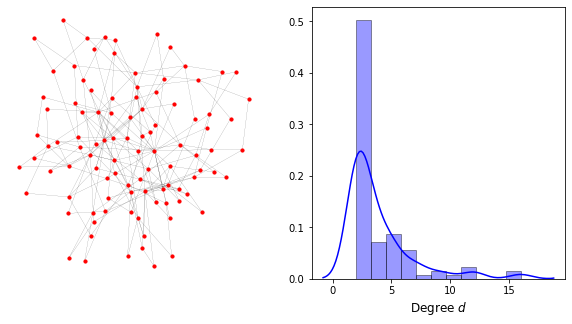

In [83]:
BA = nx.barabasi_albert_graph(100, 2)

fig, ax = plt.subplots(1 ,2, figsize=(10,5))
nx.draw(BA, node_size=10, width = 0.1, ax=ax[0])

deg= BA.degree()
degree_list= []
for i in deg:
    degree_list.append(i[1]) 

sns.distplot(degree_list,  hist=True, kde=True, color = 'blue', hist_kws={'edgecolor':'black'})
ax[1].set_xlabel('Degree $d$', fontsize=12)

The BA model is a Evolving Network Model while the ER model is Static Model.

The ER model has a fixed number of nodes and assume that the role of the network modeler is to place the links between the nodes using some random algorithm. 

The BA model addes nodes sequentially and connect them to previously excisting nodes.

The ER model allows us to check if a certain network property could be explained by a pure random connectivity pattern, while the BA model can be usefull if we want to understand the origin of a network property because the model captures the processes that built the network in the first place. 



### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [88]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [4]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [129]:
def create_slice(t0, t1):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
    return G_t

t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice 
t1 = data.timestamp.max()                # Upper bound of time-slice

G_oneyear = create_slice(t0, t1)
print('number of nodes: %d \nnumber of edges: %d' % (len(G_oneyear.nodes), len(G_oneyear.edges)))

number of nodes: 44397 
number of edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

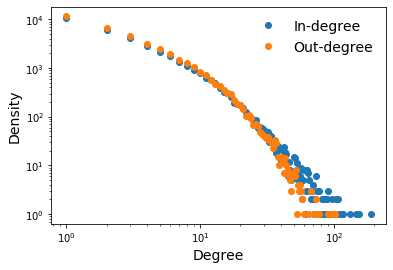

In [130]:
def degree_dist(data):
    
    # In-degree: the number of edges pointing in to the node
    in_degree_sequence = sorted([d for n, d in data.in_degree()]) 
    # Out-degree: the number of edges pointing out of the node
    out_degree_sequence = sorted([d for n, d in data.out_degree()]) 
    
    in_degreeCount = Counter(in_degree_sequence) 
    out_degreeCount = Counter(out_degree_sequence)
    
    del in_degreeCount[0] #Removing data point for degree 0
    del out_degreeCount[0] #Removing data point for degree 0
    
    in_deg, in_count = zip(*in_degreeCount.items())
    out_deg, out_count = zip(*out_degreeCount.items())
 
    plt.plot(in_deg, in_count, 'o', label= "In-degree")
    plt.plot(out_deg, out_count, 'o', label= "Out-degree")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
    
degree_dist(G_oneyear)

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [131]:
G_cluster = nx.clustering(G_oneyear, weight='weight')

cluster_min = sorted(set(G_cluster.values()))[1]
cluster_max = sorted(set(G_cluster.values()))[-1]

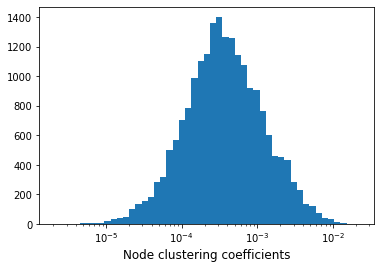

In [134]:
logbins = np.logspace(np.log10(cluster_min),np.log10(cluster_max), 50)
plt.hist(G_cluster.values(), bins=logbins)
plt.xscale('log')
plt.xlabel('Node clustering coefficients', fontsize=12)
plt.show()

Note: The clustering coefficients appear to follow a normal distribution

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [136]:
from netwulf import visualize

In [141]:
visualize(G_oneyear)

(None, None)